In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
%matplotlib inline 

In [2]:
def generate_noise(l):
    noiser = np.random.uniform(0,1,l)
    noisexa = np.random.uniform(0,1,l)
    noisexb = np.random.uniform(0,1,l)
    ynoise = np.random.uniform(0,1,l)
    mon=[0]*l
    tue=[0]*l
    wed=[0]*l
    thu=[0]*l
    fri=[0]*l
    jan=[0]*l
    feb=[0]*l
    mar=[0]*l
    apr=[0]*l
    may=[0]*l
    jun=[0]*l
    jul=[0]*l
    aug=[0]*l
    sep=[0]*l
    oct=[0]*l
    nov=[0]*l
    dec=[0]*l
    
    
    for i in xrange(len(X)):
        if noiser[i]>=0.5:
            ynoise[i]=1
            val = 1       
        else:
            ynoise[i]=0
            val = 0
        mon[i] = val
        tue[i] = val
        wed[i] = val
        thu[i] = val
        fri[i] = val

        jan[i] = val
        feb[i] = val
        mar[i] = val
        apr[i] = val
        may[i] = val
        jun[i] = val
        jul[i] = val
        aug[i] = val
        sep[i] = val
        oct[i] = val
        nov[i] = val
        dec[i] = val 
    # ynoise = np.array(ynoise)
    # ynoise[np.random.randint(1257, size=100)]=0
    Xnoise = pd.DataFrame.from_items([('xa', noisexa),('xb', noisexb),('mon',mon),('tue',tue),
                                      ('wed',wed),('thu',thu),('fri',fri),
                                      ('jan',jan),('feb',feb),('mar',mar),
                                      ('apr',apr),('may',may),('jun',jun),
                                      ('jul',jul),('aug',aug),('sep',sep),
                                     ('oct',oct),('nov',nov),('dec',dec)])
    Ynoise = pd.DataFrame.from_items([('y',ynoise)])
    X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(Xnoise, Ynoise['y'], 
                                                                                test_size=0.3, random_state=0)
    return X_train_noise, X_test_noise, y_train_noise, y_test_noise

In [8]:
l={1,2,3,5,10,20,40,60,120,250}
tsaslst = {}
gainlst = {}
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
for filename in sorted(l):
    data = pd.read_csv("indi"+str(filename)+".csv")
    X = data[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y = data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train_noise, X_test_noise, y_train_noise, y_test_noise = generate_noise(len(X))
    print("Processing for horizon = ",filename)
    maxval = -10000.0
    c = 0.0
    sval = 0.0
    for cval in {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0}:
        clf = svm.SVC(kernel='rbf', C=cval, probability=True)
        scores_noise = cross_val_score(clf, X_train_noise, y_train_noise, cv=3)
        anoise = scores_noise.mean()
        scores = cross_val_score(clf, X_train, y_train, cv=3)
        ascores = scores.mean()
        dfr = ascores - anoise
        sval = sval+dfr
        if maxval<dfr:
            maxval = dfr
            c = cval
        print(cval, (dfr))
    print (c, maxval, (sval/10.0))
    clf = svm.SVC(kernel='rbf', C=c, probability=True)
    clf.fit(X_train,y_train)
    lw=2
    # read test data from file here
    testdata = pd.read_csv("test"+str(filename)+".csv")
    X_test = testdata[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y_test = testdata['y']
    predictions = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    print ("AUC good = ",roc_auc)
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    
    clf.fit(X_train_noise,y_train_noise)
    predictions_noise = clf.predict(X_test_noise)
    probs_noise = clf.predict_proba(X_test_noise)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_noise, probs_noise[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc ("AUC noise = ",roc_auc)
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    
    print ("C = ",c)
    tsas = metrics.accuracy_score(y_test,predictions)
    tsaslst[float(filename)] = tsas
    print ("TSAScore = ", tsas)
    gain = (tsas - metrics.accuracy_score(y_test_noise,predictions_noise))
    gainlst[float(filename)] = gain
    print ("Gain = ",gain)
    print ("==================================================")


FileNotFoundError: File b'indi1.csv' does not exist

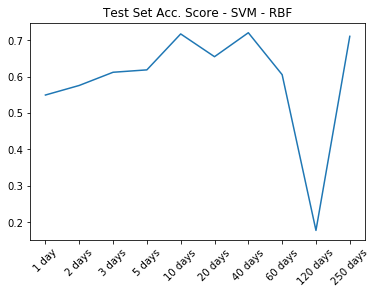

In [4]:
import pylab as pl
y = np.array(np.ravel(tsaslst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Test Set Acc. Score - SVM - RBF")
plt.show()

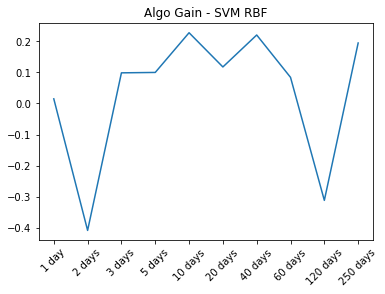

In [5]:
import pylab as pl
y = np.array(np.ravel(gainlst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Algo Gain - SVM RBF")
plt.show()

In [43]:
# l={1,3,5,10,20,40,60,120,250}
# tsaslst = {}
# gainlst = {}
# for filename in sorted(l):
#     data = pd.read_csv("indi"+str(filename)+".csv")
#     X = data[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
#              , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
#     y = data['y']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#     X_train_noise, X_test_noise, y_train_noise, y_test_noise = generate_noise(len(X))
#     print "Processing for horizon = ",filename
#     maxval = -10000.0
#     c = 0.0
#     sval = 0.0
#     for cval in {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0}:
#         clf = svm.SVC(kernel='linear', C=cval)
#         scores_noise = cross_val_score(clf, X_train_noise, y_train_noise, cv=3)
#         anoise = scores_noise.mean()
#         scores = cross_val_score(clf, X_train, y_train, cv=3)
#         ascores = scores.mean()
#         dfr = ascores - anoise
#         sval = sval+dfr
#         if maxval<dfr:
#             maxval = dfr
#             c = cval
#         print(cval, (dfr))
#     print c,maxval, (sval/10.0)
#     clf = svm.SVC(kernel='linear', C=c)
#     clf.fit(X_train,y_train)
#     # read test data from file here
#     testdata = pd.read_csv("test"+str(filename)+".csv")
#     X_test = testdata[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
#              , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
#     y_test = testdata['y']
#     predictions = clf.predict(X_test)
#     clf.fit(X_train_noise,y_train_noise)
#     predictions_noise = clf.predict(X_test_noise)
#     tsas = metrics.accuracy_score(y_test,predictions)
#     tsaslst[float(filename)] = tsas
#     print "TSAScore = ", tsas
#     print "C = ",c
#     gain = (tsas - metrics.accuracy_score(y_test_noise,predictions_noise))
#     gainlst[filename] = gain
#     print "Gain = ",gain
#     print "=================================================="

In [ ]:
# import pylab as pl
# y = np.array(np.ravel(tsaslst.values()))
# x=range(9)
# xTicks = ['1 day','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# # b = np.array(np.ravel(gainlst.keys()))
# plt.xticks(x,xTicks)
# plt.xticks(range(9),xTicks,rotation=45)
# plt.plot(x,y)
# plt.title("Test Set Acc. Score - SVM - Linear")
# plt.show()

In [ ]:
# import pylab as pl
# y = np.array(np.ravel(gainlst.values()))
# x=range(10)
# xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# # b = np.array(np.ravel(gainlst.keys()))
# plt.xticks(x,xTicks)
# plt.xticks(range(10),xTicks,rotation=45)
# plt.plot(x,y)
# plt.title("Algo Gain - SVM Linear")
# plt.show()

Processing for horizon =  1
(200, -0.0046948356807511304)
(300, -0.0046948356807511304)
(100, -0.0046948356807511304)
100 -0.00469483568075 -0.00140845070423
AUC good =  0.524126928625


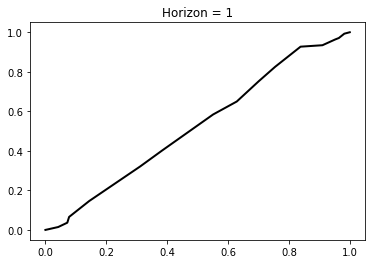

AUC noise =  1.0


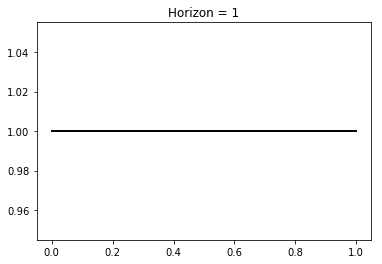

TSAScore =  0.450657894737
C =  100
Gain =  -0.549342105263
Processing for horizon =  2
(200, -0.4386317907444669)
(300, -0.47176391683433938)
(100, -0.47176391683433938)
200 -0.438631790744 -0.138215962441
AUC good =  0.54496124031


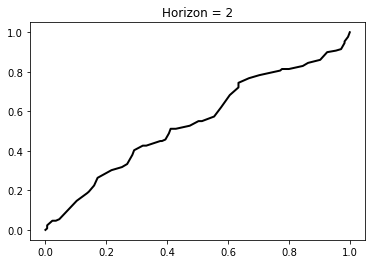

AUC noise =  1.0


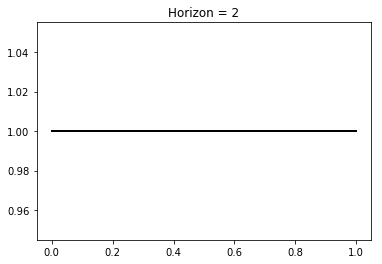

TSAScore =  0.460526315789
C =  200
Gain =  -0.539473684211
Processing for horizon =  3
(200, -0.419047619047619)
(300, -0.41005291005291011)
(100, -0.41917989417989421)
300 -0.410052910053 -0.124828042328
AUC good =  0.479496992892


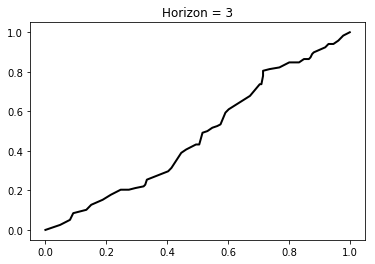

AUC noise =  1.0


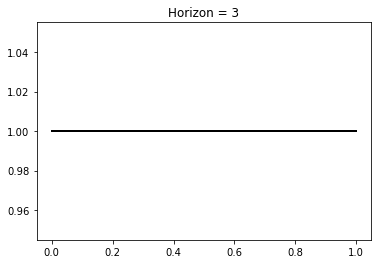

TSAScore =  0.394736842105
C =  300
Gain =  -0.605263157895
Processing for horizon =  5
(200, -0.38215962441314544)
(300, -0.3965124077800134)
(100, -0.40570087189805504)
200 -0.382159624413 -0.118437290409
AUC good =  0.479480007337


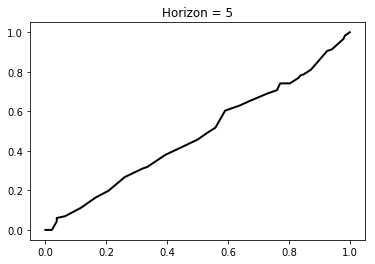

AUC noise =  1.0


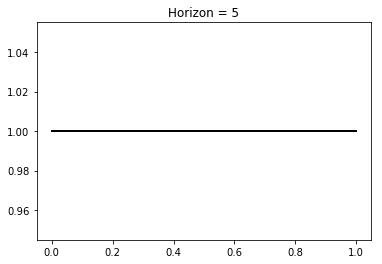

TSAScore =  0.381578947368
C =  200
Gain =  -0.618421052632
Processing for horizon =  10
(200, -0.35806878306878309)
(300, -0.348941798941799)
(100, -0.36772486772486779)
300 -0.348941798942 -0.107473544974
AUC good =  0.494950945202


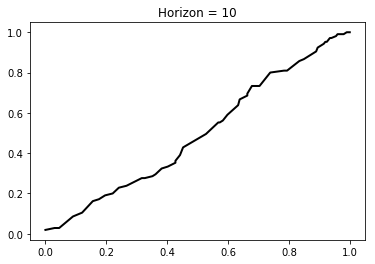

AUC noise =  1.0


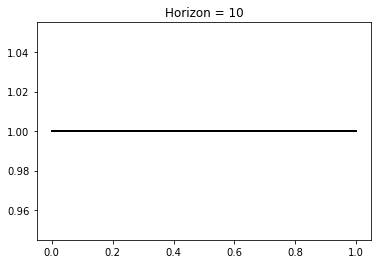

TSAScore =  0.345394736842
C =  300
Gain =  -0.654605263158
Processing for horizon =  20
(200, -0.30194500335345398)
(300, -0.3065727699530516)
(100, -0.3160295103957077)
200 -0.301945003353 -0.0924547283702
AUC good =  0.457426806339


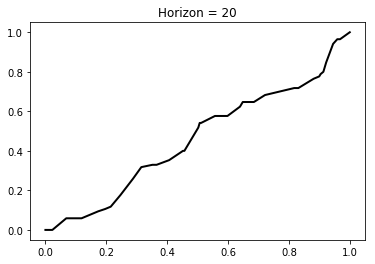

AUC noise =  1.0


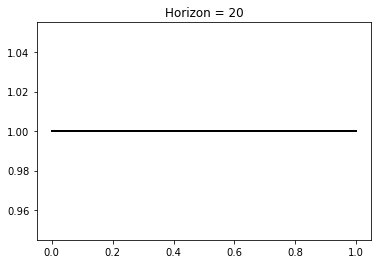

TSAScore =  0.279605263158
C =  200
Gain =  -0.720394736842
Processing for horizon =  40
(200, -0.18866532528504365)
(300, -0.17458081824279004)
(100, -0.19812206572769941)
300 -0.174580818243 -0.0561368209256
AUC good =  0.504667164498


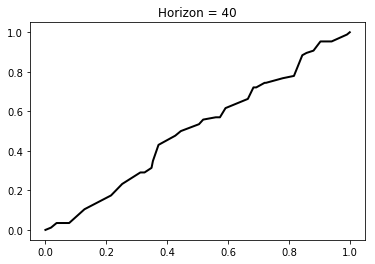

AUC noise =  1.0


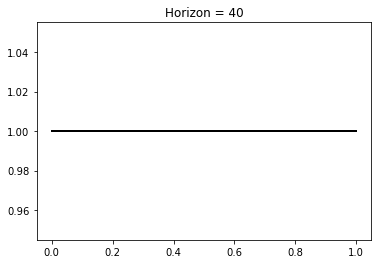

TSAScore =  0.282894736842
C =  300
Gain =  -0.717105263158
Processing for horizon =  60
(200, -0.056613756613756672)
(300, -0.056613756613756672)
(100, -0.056613756613756672)
100 -0.0566137566138 -0.0169841269841
AUC good =  0.598011363636


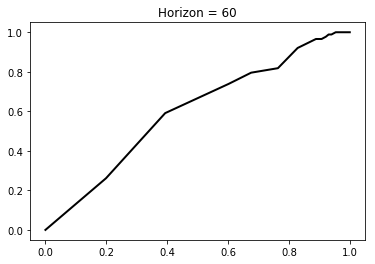

AUC noise =  1.0


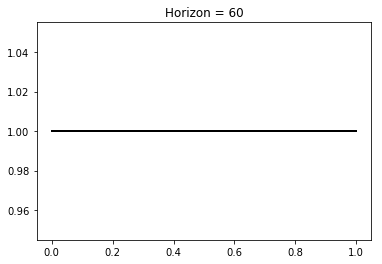

TSAScore =  0.289473684211
C =  100
Gain =  -0.710526315789
Processing for horizon =  120
(200, -0.16507936507936505)
(300, -0.16018518518518521)
(100, -0.16984126984126979)
300 -0.160185185185 -0.0495105820106
AUC good =  0.524275362319


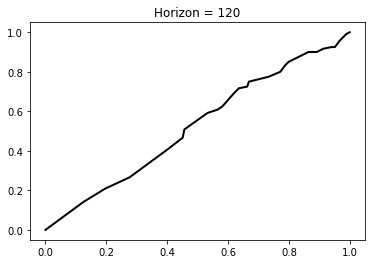

AUC noise =  1.0


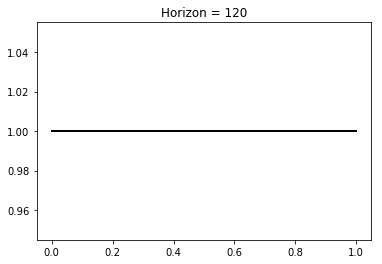

TSAScore =  0.394736842105
C =  300
Gain =  -0.605263157895
Processing for horizon =  250
(200, -0.20291005291005282)
(300, -0.17460317460317454)
(100, -0.17460317460317454)
100 -0.174603174603 -0.0552116402116
AUC good =  0.781185185185


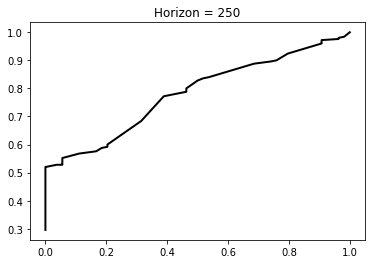

AUC noise =  1.0


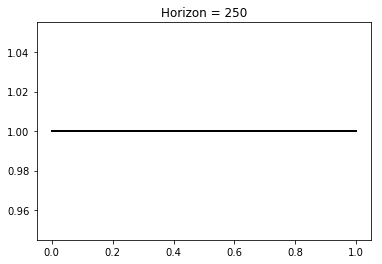

TSAScore =  0.782894736842
C =  100
Gain =  -0.217105263158


In [60]:
# Random forest n_estimators=100,criterion='gini'
l={1,2,3,5,10,20,40,60,120,250}
tsaslst = {}
gainlst = {}
for filename in sorted(l):
    data = pd.read_csv("ir"+str(filename)+".csv")
    X = data[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y = data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train_noise, X_test_noise, y_train_noise, y_test_noise = generate_noise(len(X))
    print "Processing for horizon = ",filename
    maxval = -10000.0
    c = 0.0
    sval = 0.0
    for numtrees in {100,200,300}:
        clf = RandomForestClassifier(n_estimators=numtrees,criterion='gini')
        # 3-Fold Cross validation
        scores_noise = cross_val_score(clf, X_train_noise, y_train_noise, cv=3)
        anoise = scores_noise.mean()
        scores = cross_val_score(clf, X_train, y_train, cv=3)
        ascores = scores.mean()
        dfr = ascores - anoise
        sval = sval+dfr
        if maxval<=dfr:
            maxval = dfr
            c = numtrees
        print(numtrees, (dfr))
    print c,maxval, (sval/10.0)
    lw=2
    clf = RandomForestClassifier(n_estimators=int(c),criterion='gini')
    clf.fit(X_train,y_train)
    # read test data from file here
    testdata = pd.read_csv("test"+str(filename)+".csv")
    X_test = testdata[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y_test = testdata['y']
    predictions = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    print "AUC good = ",roc_auc
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    
    clf.fit(X_train_noise,y_train_noise)
    predictions_noise = clf.predict(X_test_noise)
    probs_noise = clf.predict_proba(X_test_noise)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_noise, probs_noise[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    print "AUC noise = ",roc_auc
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    tsas = metrics.accuracy_score(y_test,predictions)
    tsaslst[filename] = tsas
    print "TSAScore = ",tsas
    print "C = ",c
    gain = tsas - metrics.accuracy_score(y_test_noise,predictions_noise)
    gainlst[filename] = gain
    print "Gain = ",gain
    print "=================================================="

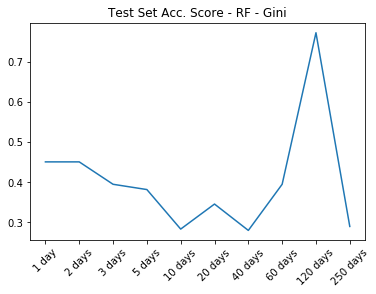

In [7]:
import pylab as pl
y = np.array(np.ravel(tsaslst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Test Set Acc. Score - RF - Gini")
plt.show()

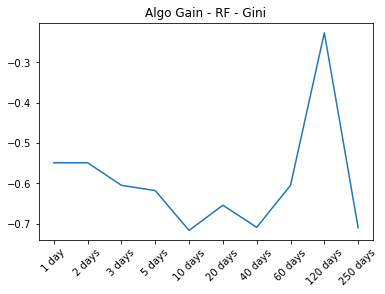

In [8]:
import pylab as pl
y = np.array(np.ravel(gainlst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Algo Gain - RF - Gini")
plt.show()

Processing for horizon =  1
(200, -0.0046948356807511304)
(300, -0.0046948356807511304)
(100, -0.0046948356807511304)
200 -0.00469483568075 -0.00140845070423
AUC good =  0.491957690458


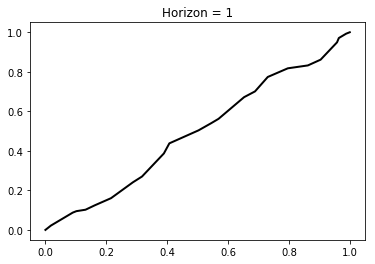

AUC noise =  1.0


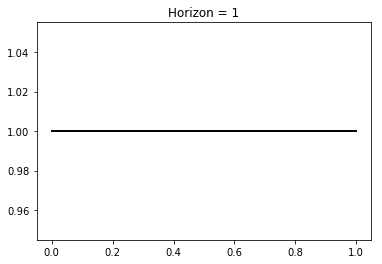

TSAScore =  0.450657894737
C =  200
Gain =  -0.549342105263
Processing for horizon =  2
(200, -0.45767940979208588)
(300, -0.43876592890677391)
(100, -0.45741113346747153)
300 -0.438765928907 -0.135385647217
AUC good =  0.546888150609


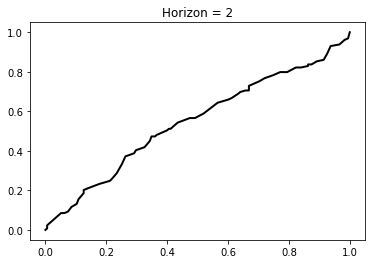

AUC noise =  1.0


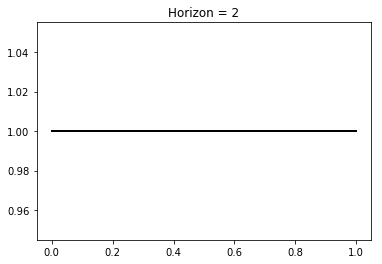

TSAScore =  0.424342105263
C =  300
Gain =  -0.575657894737
Processing for horizon =  3
(200, -0.40992063492063491)
(300, -0.42407407407407405)
(100, -0.42394179894179895)
200 -0.409920634921 -0.125793650794
AUC good =  0.483255877529


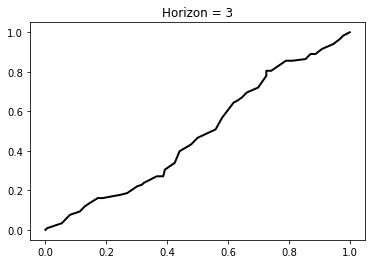

AUC noise =  1.0


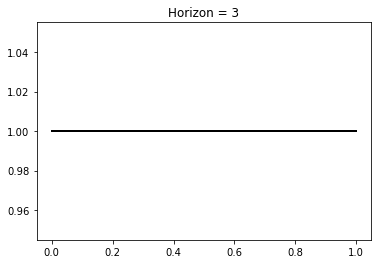

TSAScore =  0.388157894737
C =  200
Gain =  -0.611842105263
Processing for horizon =  5
(200, -0.39154929577464792)
(300, -0.39624413145539916)
(100, -0.41529175050301814)
200 -0.391549295775 -0.120308517773
AUC good =  0.467145084373


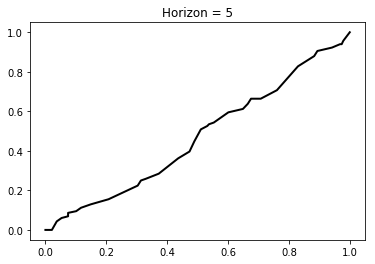

AUC noise =  1.0


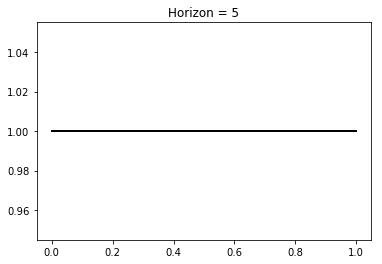

TSAScore =  0.381578947368
C =  200
Gain =  -0.618421052632
Processing for horizon =  10
(200, -0.32539682539682546)
(300, -0.34880952380952379)
(100, -0.3392857142857143)
200 -0.325396825397 -0.101349206349
AUC good =  0.475855467815


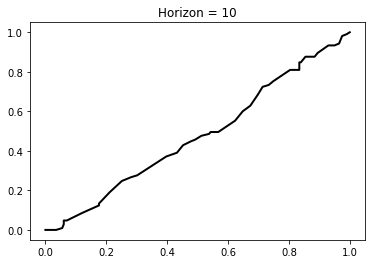

AUC noise =  1.0


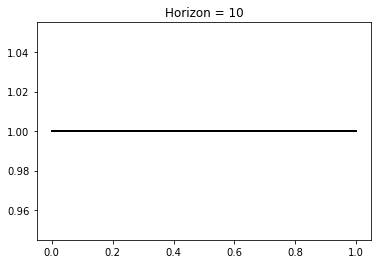

TSAScore =  0.348684210526
C =  200
Gain =  -0.651315789474
Processing for horizon =  20
(200, -0.28772635814889336)
(300, -0.30650570087189799)
(100, -0.30650570087189799)
200 -0.287726358149 -0.0900737759893
AUC good =  0.463550899812


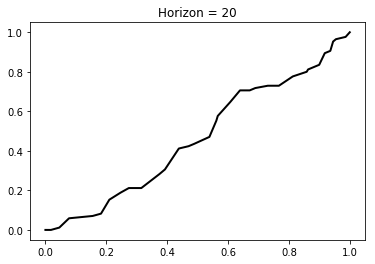

AUC noise =  1.0


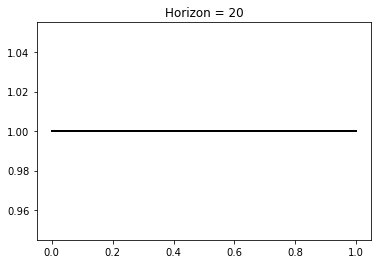

TSAScore =  0.279605263158
C =  200
Gain =  -0.720394736842
Processing for horizon =  40
(200, -0.16981891348088529)
(300, -0.17458081824279004)
(100, -0.18873239436619704)
200 -0.169818913481 -0.053313212609
AUC good =  0.528989758908


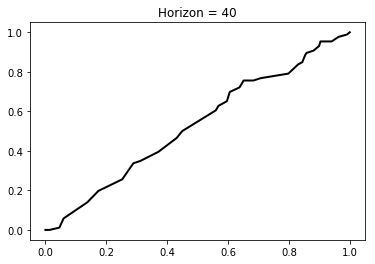

AUC noise =  1.0


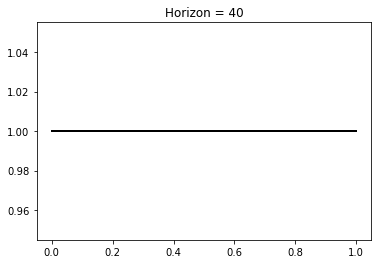

TSAScore =  0.282894736842
C =  200
Gain =  -0.717105263158
Processing for horizon =  60
(200, -0.056613756613756672)
(300, -0.061375661375661417)
(100, -0.056613756613756672)
200 -0.0566137566138 -0.0174603174603
AUC good =  0.577230639731


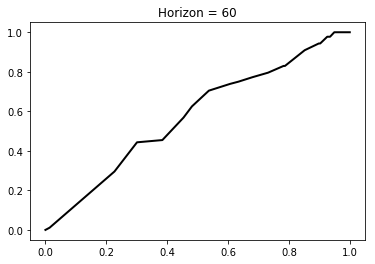

AUC noise =  1.0


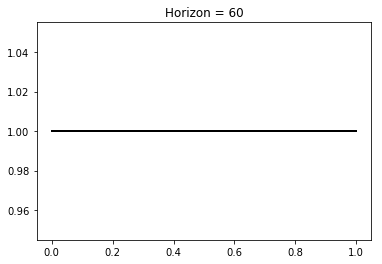

TSAScore =  0.289473684211
C =  200
Gain =  -0.710526315789
Processing for horizon =  120
(200, -0.16044973544973551)
(300, -0.1603174603174603)
(100, -0.15568783068783076)
100 -0.155687830688 -0.0476455026455
AUC good =  0.508808876812


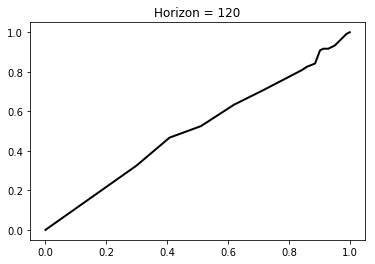

AUC noise =  1.0


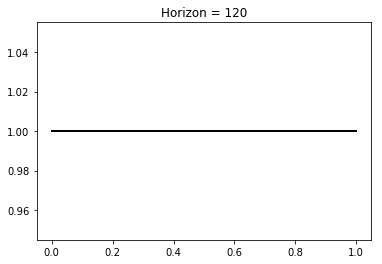

TSAScore =  0.394736842105
C =  100
Gain =  -0.605263157895
Processing for horizon =  250
(200, -0.19814814814814807)
(300, -0.18875661375661379)
(100, -0.21243386243386242)
300 -0.188756613757 -0.0599338624339
AUC good =  0.766444444444


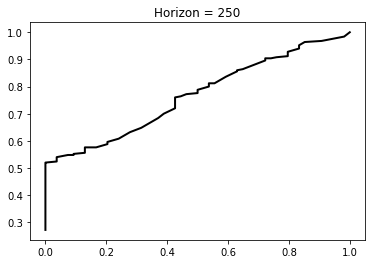

AUC noise =  1.0


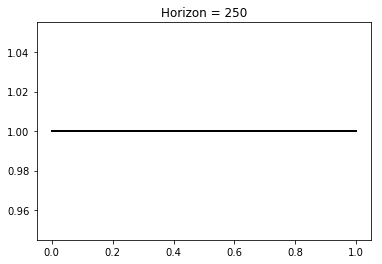

TSAScore =  0.740131578947
C =  300
Gain =  -0.259868421053


In [61]:
# Ranfom forest n_estimators=100,criterion='information gain'
l={1,2,3,5,10,20,40,60,120,250}
tsaslst = {}
gainlst = {}
for filename in sorted(l):
    data = pd.read_csv("ir"+str(filename)+".csv")
    X = data[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y = data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train_noise, X_test_noise, y_train_noise, y_test_noise = generate_noise(len(X))
    print "Processing for horizon = ",filename
    maxval =  -10000.0
    c = 0.0
    sval = 0.0
    for numtrees in {100,200,300}:
        clf = RandomForestClassifier(n_estimators=numtrees,criterion='entropy')
        # 3-Fold Cross validation
        scores_noise = cross_val_score(clf, X_train_noise, y_train_noise, cv=3)
        anoise = scores_noise.mean()
        scores = cross_val_score(clf, X_train, y_train, cv=3)
        ascores = scores.mean()
        dfr = ascores - anoise
        sval = sval+dfr
        if maxval<dfr:
            maxval = dfr
            c = numtrees
        print(numtrees, (dfr))
    print c,maxval, (sval/10.0)
    clf = RandomForestClassifier(n_estimators=int(c),criterion='entropy')
    clf.fit(X_train,y_train)
    # read test data from file here
    testdata = pd.read_csv("test"+str(filename)+".csv")
    X_test = testdata[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y_test = testdata['y']
    predictions = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    print "AUC good = ",roc_auc
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    
    clf.fit(X_train_noise,y_train_noise)
    predictions_noise = clf.predict(X_test_noise)
    probs_noise = clf.predict_proba(X_test_noise)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_noise, probs_noise[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    print "AUC noise = ",roc_auc
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    
    tsas = metrics.accuracy_score(y_test,predictions)
    tsaslst[filename] = tsas
    print "TSAScore = ",tsas
    print "C = ",c
    gain = tsas - metrics.accuracy_score(y_test_noise,predictions_noise)
    gainlst[filename] = gain
    print "Gain = ",gain
    print "=================================================="

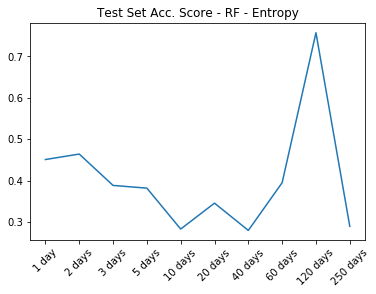

In [10]:
import pylab as pl
y = np.array(np.ravel(tsaslst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Test Set Acc. Score - RF - Entropy")
plt.show()

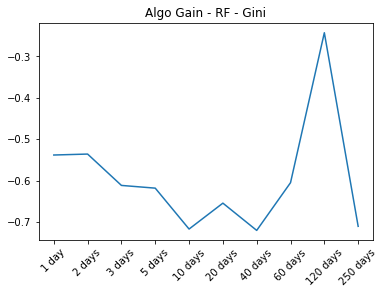

In [11]:
import pylab as pl
y = np.array(np.ravel(gainlst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Algo Gain - RF - Gini")
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import optimizers
from keras import initializers


Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [13]:
seed = 7
np.random.seed(seed)

In [ ]:
l={1,2,3,5,10,20,40,60,120,250}
tsaslst = {}
gainlst = {}
for filename in sorted(l):
    data = pd.read_csv("indi"+str(filename)+".csv")
    X = data[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri','Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y = data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train_noise, X_test_noise, y_train_noise, y_test_noise = generate_noise(len(X))
    print "Processing for horizon = ",filename
    maxval = -10000.0
    c = 0.0
    sval = 0.0
    fmodel = Sequential()
    fnmodel = Sequential()
    for reg in {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0}:
        # Use 2 hidden layers {100,100}
        print "Alpha = ", reg
        model = Sequential()
        model.add(Dense(100, input_dim=19, kernel_initializer='uniform', kernel_regularizer=regularizers.l2(reg), activation='relu'))
        model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
        model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
        sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)
        model.compile(loss='mean_squared_error', optimizer=sgd, )
        
        nmodel = Sequential()
        nmodel.add(Dense(100, input_dim=19, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(reg)))
        nmodel.add(Dense(100, kernel_initializer='uniform', activation='relu'))
        nmodel.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
        sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)
        nmodel.compile(loss='mean_squared_error', optimizer=sgd)
        
        nmodel.fit(np.array(X_train_noise), np.array(y_train_noise), epochs=1,batch_size=100)
        neval = model.evaluate(np.array(X_train_noise), np.array(y_train_noise))
        model.fit(np.array(X_train), np.array(y_train), epochs=1, batch_size=100)
        geval = model.evaluate(np.array(X_train), np.array(y_train))
        
        dfr = geval - neval
        sval = sval+dfr
        if maxval<dfr:
            maxval = dfr
            c = reg
            fmodel = model
            fnmodel = nmodel
        print(reg, (dfr))
        
    print c,maxval, (sval/10.0)
    # read test data from file here
    testdata = pd.read_csv("test"+str(filename)+".csv")
    X_test = testdata[['xa'+str(filename), 'xb'+str(filename), 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Jan', 'Feb', 'Mar', 'Apr', 'May'
             , 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec']]
    y_test = testdata['y']
       
    gpreds = fmodel.predict(np.array(X_test))
    probs = fmodel.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    print "AUC good = ",roc_auc
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    
    npreds = fnmodel.predict(np.array(X_test_noise))
    probs_noise = clf.predict_proba(X_test_noise)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_noise, probs_noise[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    print "AUC noise = ",roc_auc
    plt.plot(fpr, tpr, lw=lw, color='black',
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.title("Horizon = "+str(filename))
    plt.show()
    
    for i in xrange(len(gpreds)):
        if gpreds[i] > 0:
            gpreds[i] = 1
        else:
            gpreds[i] = 0
    for i in xrange(len(npreds)):
        if npreds[i] > 0:
            npreds[i] = 1
        else:
            npreds[i] = 0
    print "C = ",c
    tsas = metrics.accuracy_score(y_test,gpreds)
    tsaslst[filename] = tsas
    print "TSAScore = ",tsas
    print "C = ",c
    gain = tsas - metrics.accuracy_score(y_test_noise,npreds)
    gainlst[filename] = gain
    print "Gain = ",gain
    print "=================================================="
    

Processing for horizon =  1
Alpha =  1.0
Epoch 1/1

In [ ]:
import pylab as pl
y = np.array(np.ravel(tsaslst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Test Set Acc. Score - DNN")
plt.show()

In [ ]:
import pylab as pl
y = np.array(np.ravel(gainlst.values()))
x=range(10)
xTicks = ['1 day','2 days','3 days','5 days','10 days', '20 days','40 days','60 days','120 days','250 days' ]
# b = np.array(np.ravel(gainlst.keys()))
plt.xticks(x,xTicks)
plt.xticks(range(10),xTicks,rotation=45)
plt.plot(x,y)
plt.title("Algo Gain - DNN ")
plt.show()

In [33]:
X_train.shape

(880, 20)